Skipping file CORR-R0003-JNGFRCTRL00-S00000.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0003/CORR-R0003-JNGFRCTRL00-S00000.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))


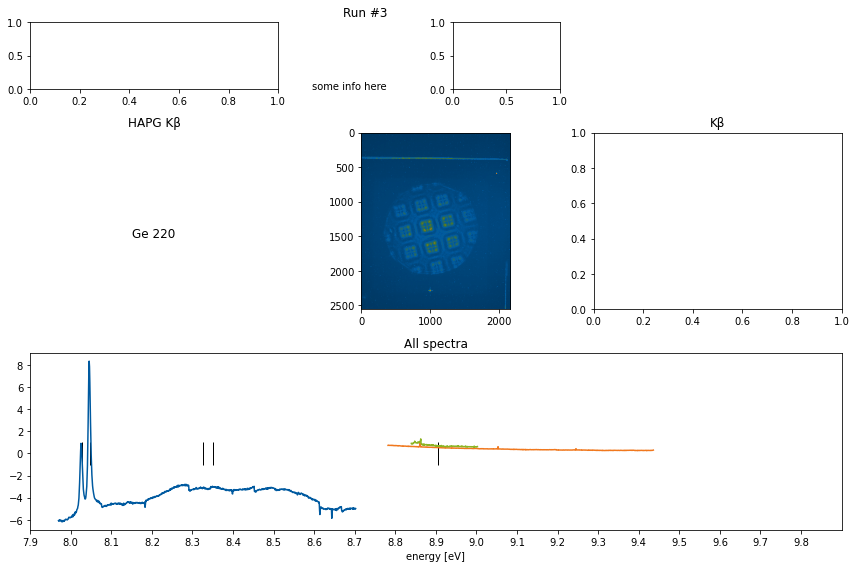

In [72]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import os
import numpy as np
import scipy
from scipy import optimize, ndimage
import matplotlib.pyplot as plt
import sys
import mmmUtils as mu
from PIL import Image
from importlib import reload 
import extra_mmm as em
import extra_data
import rossendorfer_farbenliste as rofl

reload(em)
reload(mu)
proposal=2806  #Proposal number
runNo=3
trainId=-1


outDir='./overviews/'  #Directory to store output images
lineoutDir='./lineouts/'

# %%
mu.figure(12,8)
r=5
c=6
#axHapgAImage = plt.subplot2grid((r, c), (0, 0), colspan=2, rowspan=1)
axHapgBImage = plt.subplot2grid((r, c), (1, 0), colspan=2, rowspan=1)
axGeImage = plt.subplot2grid((r, c), (2, 0), colspan=2, rowspan=1)
axSpectrumKa = plt.subplot2grid((r, c), (0, 3), colspan=1, rowspan=1)
axSpectrumKb = plt.subplot2grid((r, c), (1, 4), colspan=2, rowspan=2)
axZyla = plt.subplot2grid((r, c), (1, 2), colspan=2, rowspan=2)

axSpectrumWide = plt.subplot2grid((r, c), (3, 0), colspan=6, rowspan=2)
axHapgAImage = plt.subplot2grid((r, c), (0, 0), colspan=2, rowspan=1)
axInfo = plt.subplot2grid((r, c), (0, 2), colspan=1, rowspan=1)
col_Ge=rofl.g()
col_HapgA=rofl.b()
col_HapgB=rofl.o()
debug=0
recalc=0
run = extra_data.open_run(proposal, runNo, data='all')  #Opening the given run
jf1=[]
jf2=[]
epix=[]
zyla=em.get_image(run,runNo,'Zyla',trainId,debug=debug,recalc=recalc)

plt.sca(axInfo)
plt.title('Run #{:.0f}'.format(runNo))
plt.text(0,0,'some info here')
plt.axis('off')
# %%do the HAPG Kα spectrometer
jfA=jf2
if np.size(jfA)>0:
        #parameters
    centralY=420
    imHeight=50
    cut_left=150
    spectraHeight=10
    HapgA_x0=780
    HapgA_E0=8047
    HapgA_dispersion=-0.84
        #processing
    #jf1=np.transpose(jf1)
    jfA=jfA[centralY-imHeight:centralY+imHeight,cut_left:-1]
    jf1cut=jfA[imHeight-spectraHeight:imHeight+spectraHeight]
    HapgA_spectrum=np.nanmean(jf1cut,axis=0)
    spectrum_HapgA_norm=HapgA_spectrum/np.max(HapgA_spectrum)
    spectrum_HapgA_norm=mu.smooth(spectrum_HapgA_norm,5)
    HapgA_xax=((np.arange(np.size(HapgA_spectrum))-HapgA_x0)*HapgA_dispersion + HapgA_E0)*1e-3
    mu.dumpPickle([HapgA_xax,HapgA_spectrum],lineoutDir+'{:04.0f}_HapgA'.format(runNo))

        #plotting the image
    plt.sca(axHapgAImage)
    plt.imshow(jfA, cmap=rofl.cmap(),aspect='auto')
    mu.draw_horizontal_edges(imHeight,spectraHeight)
#    plt.plot(spectrum_HapgA_norm,'r')
    plt.plot(2*imHeight-spectrum_HapgA_norm*(imHeight-spectraHeight),'w')

    plt.xlim(0,1024)
    plt.clim(0,3000)
    #plt.colorbar()
    plt.title('HAPG Kα')
    plt.axis('off')

        #plotting the lineout(s)
    plt.sca(axSpectrumKa)
    plt.plot(HapgA_xax,HapgA_spectrum,color=col_HapgA)
    profmax=np.max(HapgA_spectrum)

    rtka=np.loadtxt('./deutsch3')
    rtkax=(rtka[:,0])
    rtkay=(rtka[:,1])/np.max(rtka[:,1],0)*profmax
    plt.plot(rtkax*1e-3,rtkay,'k',linewidth=0.2);
    plt.xlim(7.98,8.15)
    plt.ylim(0,3500)
    plt.title('Kα')

# %% HAPG K β
jfB=jf1
if np.size(jfB)>0:
        #parameters
    centralY=400
    imHeight=40
    cut_left=150
    spectraHeight=1
    HapgB_x0=164
    HapgB_E0=8905
    HapgB_dispersion=0.75
        #processing
    #jf1=np.transpose(jf1)
    jfB=jfB[centralY-imHeight:centralY+imHeight,cut_left:-1]
    jfBcut=jfB[imHeight-spectraHeight:imHeight+spectraHeight]
    HapgB_spectrum=np.nanmean(jfBcut,axis=0)
    spectrum_HapgB_norm=HapgB_spectrum/np.max(HapgB_spectrum)
    spectrum_HapgB_norm=mu.smooth(spectrum_HapgB_norm,5)
    HapgB_xax=((np.arange(np.size(HapgB_spectrum))-HapgB_x0)*HapgB_dispersion + HapgB_E0)*1e-3
    mu.dumpPickle([HapgB_xax,HapgB_spectrum],lineoutDir+'{:04.0f}_HapgB'.format(runNo))

        #plotting the image
    plt.sca(axHapgBImage)
    plt.imshow(jfB, cmap=rofl.cmap(),aspect='auto')
    mu.draw_horizontal_edges(imHeight,spectraHeight)
#    plt.plot(spectrum_HapgA_norm,'r')
    plt.plot(2*imHeight-spectrum_HapgB_norm*(imHeight-spectraHeight),'w')

    plt.xlim(0,1024)
    plt.clim(0,3000)
    #plt.colorbar()
    plt.title('HAPG Kα')
    plt.axis('off')

        #plotting the lineout(s)
    plt.sca(axSpectrumKb)
    plt.plot(HapgB_xax,HapgB_spectrum,color=col_HapgB)
    profmax=np.max(HapgB_spectrum)

#zyla
if np.size(zyla)>0:
    plt.sca(axZyla)
    plt.imshow(zyla, cmap=rofl.cmap())
    plt.clim(50,500)

    
# %% Ge spectrometer
if np.size(epix)>0: # do the HAPG Kα spectrometer
        #parameters
    centralY=760
    imHeight=30
    cut_left=300
    cut_right=1500
    spectraHeight=10
    Ge_x0=164
    Ge_E0=8905
    Ge_dispersion=0.4
    rotation_angle=1.2
        #processing
    epix=np.transpose(epix)
    im = Image.fromarray(epix)
    im = im.rotate(rotation_angle, center=[centralY,512])
    epix= np.array(im)
    epix=epix[centralY-imHeight:centralY+imHeight,cut_left:cut_right]
    epixcut=epix[imHeight-spectraHeight:imHeight+spectraHeight]
    Ge_spectrum=np.nanmean(epixcut,axis=0)
    spectrum_Ge_norm=Ge_spectrum/np.max(Ge_spectrum)
    spectrum_Ge_norm=mu.smooth(spectrum_Ge_norm,5)
    Ge_xax=((np.arange(np.size(Ge_spectrum))-Ge_x0)*Ge_dispersion + Ge_E0)*1e-3
    mu.dumpPickle([Ge_xax,Ge_spectrum],lineoutDir+'{:04.0f}_Ge'.format(runNo))

        #plotting the image
    plt.sca(axGeImage)
    plt.imshow(epix, cmap=rofl.cmap(),aspect='auto')
    mu.draw_horizontal_edges(imHeight,spectraHeight)
#    plt.plot(spectrum_HapgA_norm,'r')
    plt.plot(2*imHeight-spectrum_Ge_norm*(imHeight-spectraHeight),'w')

    plt.xlim(0,1200)
    plt.clim(0,3000)
    #plt.colorbar()
    plt.title('Ge')
    plt.axis('off')

        #plotting the lineout(s)
    plt.sca(axSpectrumKb)
    plt.plot(Ge_xax,Ge_spectrum,color=col_Ge)
    profmax=np.max(Ge_spectrum)

    plt.xlim(8.7,9.5)
    plt.ylim(0,3500)
    plt.title('Kβ')

# %%
if 1:
    plt.sca(axHapgBImage)
    plt.title('HAPG Kβ')
    plt.axis('off')

    plt.sca(axGeImage)
    plt.title('Ge 220')
    plt.axis('off')

    plt.sca(axSpectrumKb)
    plt.title('Kβ')

    plt.sca(axSpectrumWide)
    plt.plot(HapgA_xax,HapgA_spectrum,color=col_HapgA)
    plt.plot(HapgB_xax,HapgB_spectrum/12000,color=col_HapgB)
    plt.plot(Ge_xax,Ge_spectrum/1000,color=col_Ge)
    markers=np.array([8.027,8.047,8.327,8.35,8.905])
    plt.vlines(markers,-1,1,'k',linewidth=1)
    plt.title('All spectra')
    plt.xlabel('energy [eV]')
    plt.xlim(7.9,9.9)
    plt.xticks(np.arange(7.9,9.9,0.1))
    plt.tight_layout()

plt.savefig(outDir+'{:04.0f}.png'.format(runNo))


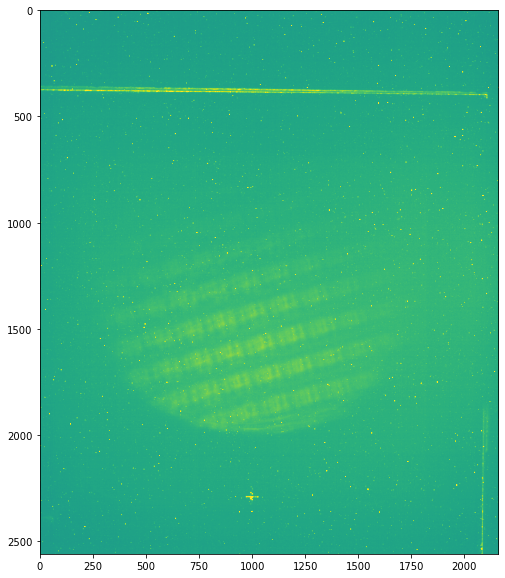

In [69]:
mu.figure(15,10)
plt.imshow(zyla)
plt.clim(00,200)

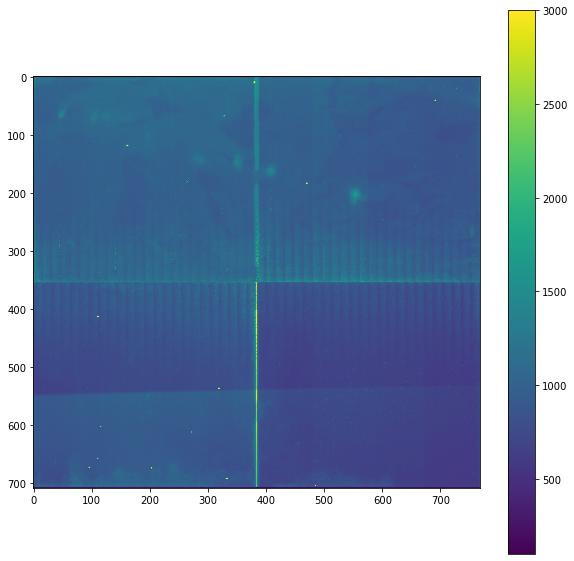

In [51]:
mu.figure(10,10)
epix=em.get_image(run,runNo,'ePix1',trainId,debug=debug,recalc=recalc)
plt.imshow(epix)
plt.colorbar()
plt.clim(100,3000)

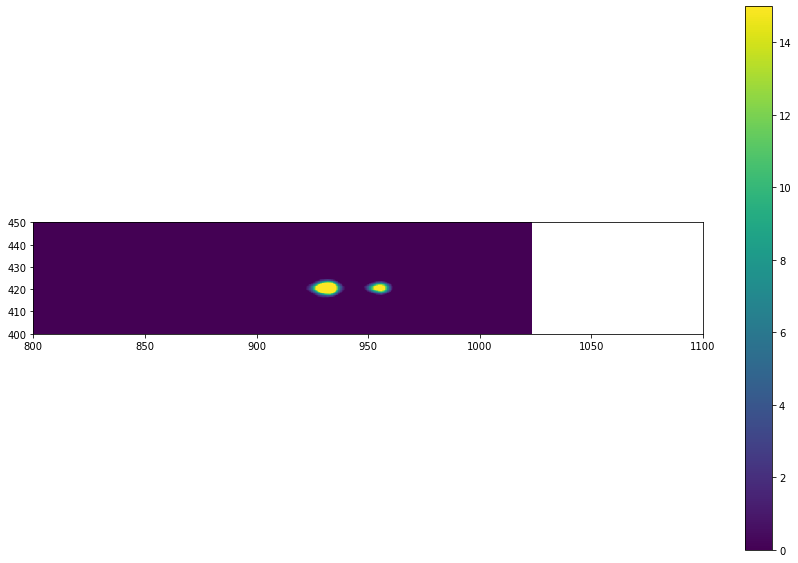

In [33]:
mu.figure(15,10)
epix=em.get_image(run,runNo,'JF2',trainId,debug=debug,recalc=recalc)
plt.imshow(epix)
plt.colorbar()
plt.xlim(800,1100)
plt.ylim(400,450)
plt.clim(0,15)

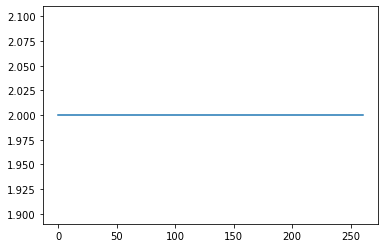

In [65]:
key="bunchPatternNode.bunchPatternPeriod.value"
key="channel_0.pulsePeriod.value"
a=run.get_array(source,key)
plt.plot(a)

In [53]:
#b=run.get_array("HED_IA1_DETM/MOTOR/LC_AXIS_4","actualPosition.value")
b=run["HED_IA1_DETM/MOTOR/LC_AXIS_4"]

In [54]:
plt.plot(b.values)

AttributeError: 'SourceData' object has no attribute 'values'

In [57]:
run.info()

# of trains:    262
Duration:       0:00:39.0
First train ID: 1064165958
Last train ID:  1064166347

0 detector modules ()

29 instrument sources (excluding detectors):
  - HED_EXP_FDI/CAM/CAM_3:daqOutput
  - HED_EXP_ZYLA/CAM/5:daqOutput
  - HED_IA1_JF500K1/DET/JNGFR01:daqOutput
  - HED_IA1_JF500K3/DET/JNGFR03:daqOutput
  - HED_IA1_LT/AVG/CAM_3:daqOutput
  - HED_IA1_LT/BKG/CAM_3:daqOutput
  - HED_IA1_LT/CAM/CAM_1:daqOutput
  - HED_IA1_LT/CAM/CAM_2:daqOutput
  - HED_IA1_LT/CAM/CAM_3:daqOutput
  - HED_IA1_LT/CAM/FSI:daqOutput
  - HED_IA1_LT/PROC/CAM_3:output
  - HED_OPT_IPM/ADC/1:channel_0.output
  - HED_OPT_IPM/ADC/1:channel_1.output
  - HED_OPT_IPM/ADC/1:channel_2.output
  - HED_OPT_IPM/ADC/1:channel_3.output
  - HED_OPT_IPM/ADC/1:channel_4.output
  - HED_OPT_IPM/ADC/1:channel_5.output
  - HED_OPT_IPM/ADC/1:channel_6.output
  - HED_OPT_IPM/ADC/1:channel_7.output
  - HED_OPT_IPM/ADC/1:channel_8.output
  - HED_OPT_IPM/ADC/1:channel_9.output
  - HED_OPT_PAM/CAM/SAMPLE_CAM_4:daqOutput
  - 